In [42]:
!pip install kneed

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Read data and store in df variable

In [25]:
df=pd.read_csv('vertebrate.csv')

Show first 5 rows of dataset

In [26]:
df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


The method info() prints a concise summary of the data frame.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Warm-blooded      15 non-null     int64 
 2   Gives Birth       15 non-null     int64 
 3   Aquatic Creature  15 non-null     int64 
 4   Aerial Creature   15 non-null     int64 
 5   Has Legs          15 non-null     int64 
 6   Hibernates        15 non-null     int64 
 7   Class             15 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


The method describe() prints descriptive statistics

In [28]:
df.describe()

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,0.400000,0.533333,0.133333,0.666667,0.333333
std,0.516398,0.507093,0.516398,0.351866,0.487950,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check if data has any missing values

In [29]:
df.isna().sum()

,0
Name,0
Warm-blooded,0
Gives Birth,0
Aquatic Creature,0
Aerial Creature,0
Has Legs,0
Hibernates,0
Class,0


check if data set is balanced

<Axes: xlabel='Class', ylabel='count'>

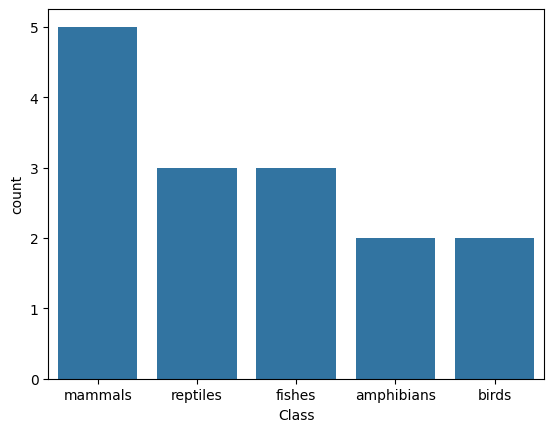

In [30]:
sns.countplot(data = df, x = 'Class')

split our data set into predictors (X) and target (y) columns

In [31]:
X = df.drop(columns=['Name','Class'])
X.head()

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1


Save the target variable in y

In [32]:
y = df['Class']

Value_counts counts the unique value

In [33]:
y.value_counts()

,count
Class,
mammals,5
reptiles,3
fishes,3
amphibians,2
birds,2


Splitting the data into training and test data set. Using train_test_split()

In [34]:
from sklearn.model_selection import train_test_split

Split X and Y into training and testing data set, which testing set containing 40% of values

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

now we train to fit the decision tree and use it to predict our test data set.

In [55]:
from sklearn.tree import DecisionTreeClassifier # Import classifier
model=DecisionTreeClassifier() # Initilise
model.fit(X_train,y_train) #train
y_predict = model.predict(X_test) #test
y_predict

array(['reptiles', 'birds', 'mammals', 'mammals', 'reptiles', 'reptiles'],
      dtype=object)

comapre predictions with the actual values

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
cm


array([[0, 0, 0, 2],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 1]])

visualise it as a confusion matrix

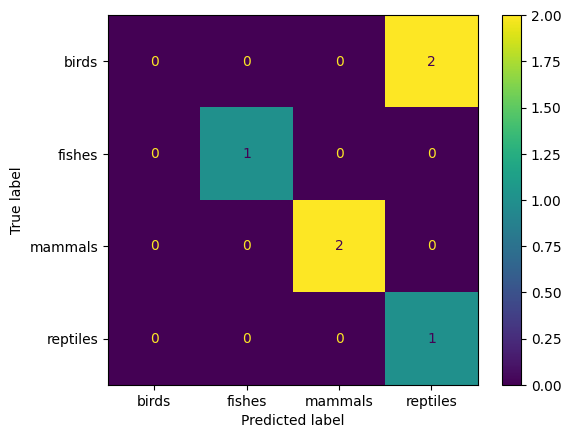

In [57]:
display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                display_labels=model.classes_)

display.plot()
plt.show()

now lets show the decision tree

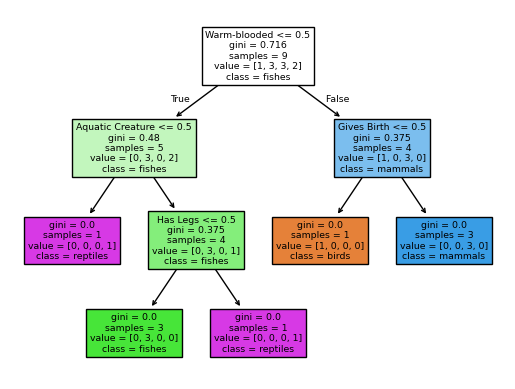

In [58]:
from sklearn import tree
#fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X.columns,
                   class_names=model.classes_,
                   filled=True)